##### Loading required libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

##### Loading the data for BIPOC jobs

In [2]:
data = pd.read_csv('job_data.csv')
data

C:\Users\ishan\AppData\Local\Temp\ipykernel_5828\4214362770.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('job_data.csv')


,_id,agency,compliance_project_name,project_address,neighborhood,developer,general_contractor_name,subcontractor,trade,period_ending,gender,person_of_color,race,boston_resident,worker_hours_this_period
0,1,OED,1201 River St,NaN,NaN,NaN,Keith Construction Inc,Building Envelope Systems,Iron Worker,2024-11-09,No Answer,f,Caucasian,f,15.4
1,2,OED,1201 River St,NaN,NaN,NaN,Keith Construction Inc,Building Envelope Systems,Iron Worker,2024-11-09,Man,t,African American,f,12.4
2,3,OED,1201 River St,NaN,NaN,NaN,Keith Construction Inc,Building Envelope Systems,Iron Worker,2024-11-09,Man,t,Hispanic/Latino,f,14.5
3,4,BPDA,Roxbury Prep,69-71 Proctor Street,Roxbury,NaN,Suffolk Construction Company,Ricmor Construction Inc.,Plasterer,2024-11-05,Man,f,Caucasian,f,40.0
4,5,BPDA,Roxbury Prep,69-71 Proctor Street,Roxbury,NaN,Suffolk Construction Company,Ricmor Construction Inc.,Laborer,2024-11-05,Man,f,Caucasian,f,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807653,1807654,BPDA,West End Residences@E.Place,22 Emerson Place,NaN,NaN,Turner Construction Co.,A. A. Will Corporation,Piledriver,2003-06-13,Man,f,Caucasian,f,176.0
1807654,1807655,BPDA,West End Residences@E.Place,22 Emerson Place,NaN,NaN,Turner Construction Co.,A. A. Will Corporation,Piledriver,2003-06-13,Man,t,African American,f,54.0
1807655,1807656,BPDA,West End Residences@E.Place,22 Emerson Place,NaN,NaN,Turner Construction Co.,A. A. Will Corporation,Laborer,2003-06-13,Man,f,Caucasian,f,186.5
1807656,1807657,BPDA,West End Residences@E.Place,22 Emerson Place,NaN,NaN,Turner Construction Co.,A. A. Will Corporation,Equipment Operator,2003-06-13,Man,f,Caucasian,f,300.0


##### Looking for additional info in data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807658 entries, 0 to 1807657
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   _id                       int64  
 1   agency                    object 
 2   compliance_project_name   object 
 3   project_address           object 
 4   neighborhood              object 
 5   developer                 object 
 6   general_contractor_name   object 
 7   subcontractor             object 
 8   trade                     object 
 9   period_ending             object 
 10  gender                    object 
 11  person_of_color           object 
 12  race                      object 
 13  boston_resident           object 
 14  worker_hours_this_period  float64
dtypes: float64(1), int64(1), object(13)
memory usage: 206.9+ MB


In [4]:
neighborhoods = data['neighborhood'].dropna().unique().tolist()
print(len(neighborhoods))

128


##### Preprocessing and filtering data for district 7

In [5]:
# Converting 'worker_hours_this_period' to numeric
data['worker_hours_this_period'] = pd.to_numeric(data['worker_hours_this_period'], errors='coerce')

# Filtering data for district D7 and BIPOC workers
d7_bipoc_jobs = data[(data['person_of_color'] == 't')]
total_bipoc_hours_d7 = d7_bipoc_jobs['worker_hours_this_period'].sum()
print(total_bipoc_hours_d7)

45262107.14070005


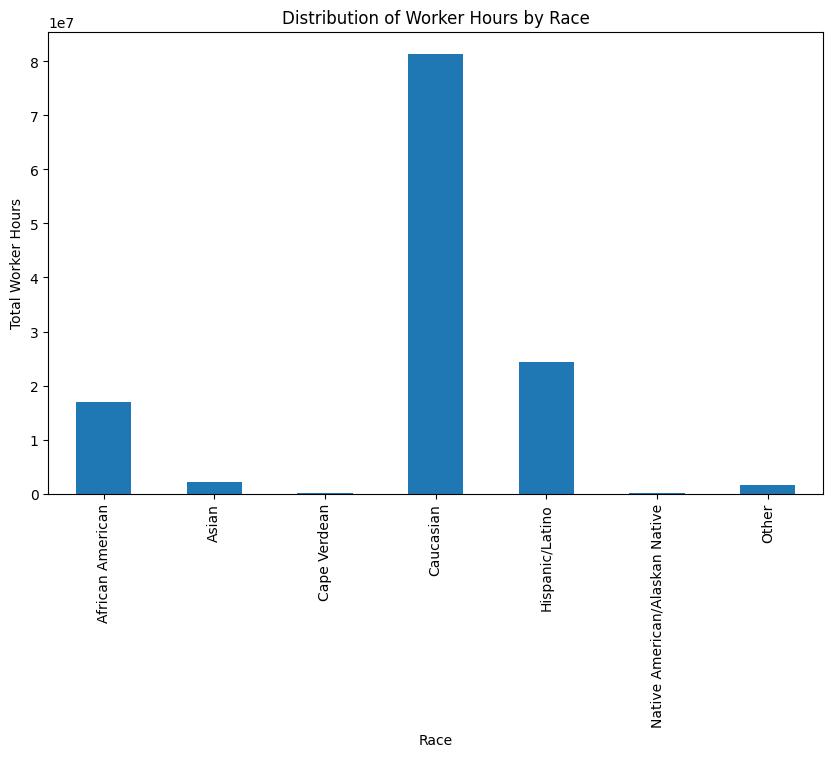

In [6]:
# Grouping by race and calculating total worker hours
race_hours = data.groupby('race')['worker_hours_this_period'].sum().dropna()

# Distribution of worker hours by race
plt.figure(figsize=(10, 6))
race_hours.plot(kind='bar')
plt.title('Distribution of Worker Hours by Race')
plt.xlabel('Race')
plt.ylabel('Total Worker Hours')
plt.show()

The chart shows the Distribution of Worker Hours by Race. **Caucasian** workers contribute the highest total worker hours by a large margin, followed by **Hispanic/Latino** and **African American workers**. Asian, Native American/Alaskan Native, Cape Verdean, and **Other** categories contribute significantly fewer worker hours, indicating a disparity in the total hours worked among racial groups.

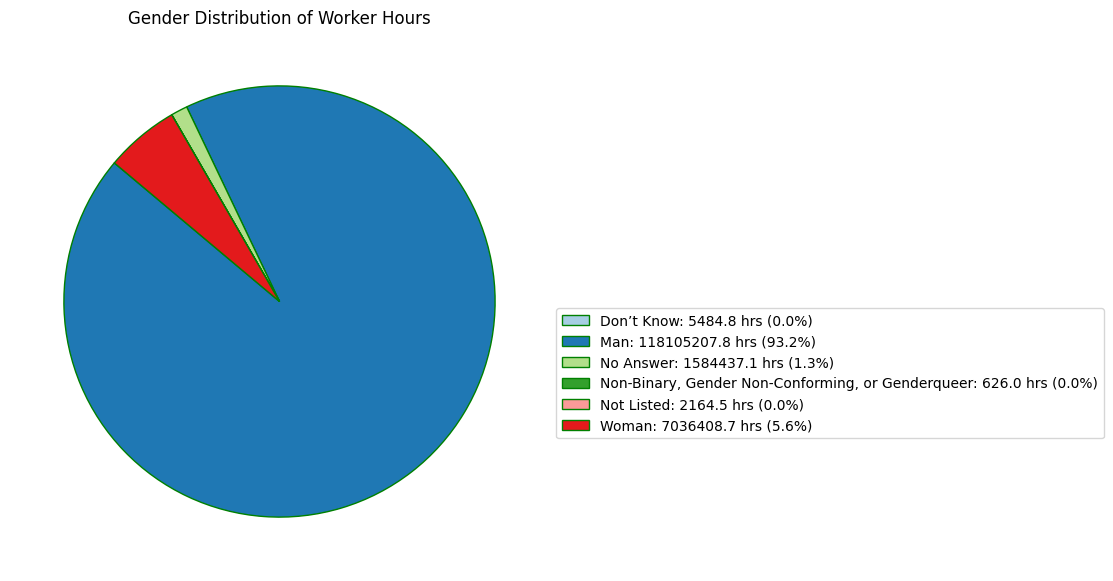

In [7]:
# Grouping by gender and calculate total worker hours
gender_hours = data.groupby('gender')['worker_hours_this_period'].sum().dropna()

colors = plt.cm.Paired(range(len(gender_hours)))
explode = [0.1 if val < 10 else 0 for val in gender_hours]  # Exploding small slices

# Pie chart 
plt.figure(figsize=(10, 7))
plt.pie(
    gender_hours,
    startangle=140,
    explode=explode,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'green'}
)
plt.title('Gender Distribution of Worker Hours')

plt.legend(
    labels=[f"{label}: {hour:.1f} hrs ({hour/sum(gender_hours)*100:.1f}%)" for label, hour in zip(gender_hours.index, gender_hours)],
    loc="upper left",
    bbox_to_anchor=(1, 0.5)
)
plt.show()

The pie chart displays the **Gender Distribution of Worker Hours**. It depicts that:

- **Men** account for the overwhelming majority of worker hours at 93.2%, highlighting significant gender disparity.
- **Women** contribute 5.6% of the total hours, far lower than men.
- Other categories, such as "No Answer," "Non-Binary," and "Not Listed," represent minimal proportions, each accounting for less than 1% of the total worker hours.
- The chart emphasizes the substantial imbalance in worker hours across gender categories.

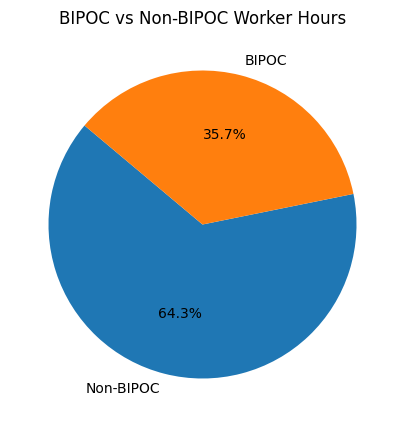

In [8]:
# Grouping by person_of_color and calculating total worker hours
bipoc_hours = data.groupby('person_of_color')['worker_hours_this_period'].sum().dropna()
bipoc_labels = ['Non-BIPOC', 'BIPOC']

# Distribution of BIPOC vs Non-BIPOC worker hours
plt.figure(figsize=(8, 5))
bipoc_hours.plot(kind='pie', labels=bipoc_labels, autopct='%1.1f%%', startangle=140)
plt.title('BIPOC vs Non-BIPOC Worker Hours')
plt.ylabel('')
plt.show()

The pie chart illustrates the **distribution of worker hours between BIPOC (Black, Indigenous, and People of Color) and Non-BIPOC** individuals:

- **Non-BIPOC** workers account for the majority of worker hours at **64.3%**, highlighting a larger representation.
- **BIPOC** workers contribute **35.7%** of the total worker hours, indicating a notable, though smaller, share compared to Non-BIPOC workers.
- This distribution reflects a disparity in worker hour allocation between these groups.

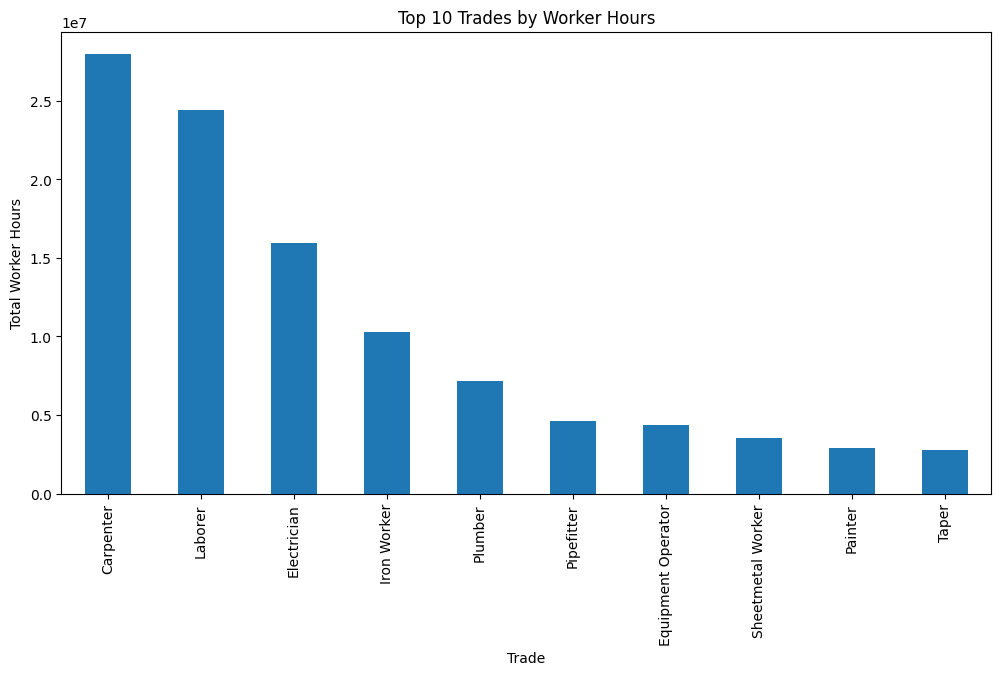

In [9]:
# Grouping by trade and calculating total worker hours
trade_hours = data.groupby('trade')['worker_hours_this_period'].sum().sort_values(ascending=False).dropna()

# Top trades by worker hours
plt.figure(figsize=(12, 6))
trade_hours.head(10).plot(kind='bar')
plt.title('Top 10 Trades by Worker Hours')
plt.xlabel('Trade')
plt.ylabel('Total Worker Hours')
plt.show()

The bar chart displays the **Top 10 Trades by Worker Hours**, showing the trades with the highest total hours worked:

- **Carpenters** and **Laborers** dominate the list, contributing the most worker hours by a significant margin.
- **Electricians**, **Iron Workers**, and **Plumbers** follow with notable, though lower, totals.
- Trades like **Pipefitters**, **Equipment Operators**, **Sheetmetal Workers**, **Painters**, and **Tapers** contribute fewer hours but remain in the top 10.
- This distribution highlights the high demand for carpentry and laborer trades relative to others.

In [10]:
for i in neighborhoods:
    print(i)

Roxbury
Dorchester
Allston/Brighton
Fenway/Kenmore
Charlestown
South Boston
Downtown
Mission Hill
Boston various locations
Jamaica Plain
Mattapan
South End
Roslindale
West Roxbury
East Boston
Chinatown
CITY OF BOSTON
Back Bay/Beacon Hill
Hyde Park/Readville
Beacon Hill
BOSTON MA
Non Boston
Fenway
Back Bay
Brighton
Allston
BRIGHTON MA 02135
CAMBRIDGE MA
105-107STRATTON ST
South Boston Waterfront
West End
JAMAICA PLAIN MA
orth End
36 WESTWOOD STREET
258-360  WALNUT,
DORCHESTER, MA 021
North End
46,48 HOLBORN
86 WHOTE STREET BO
BOSTON C. CAMPUS
IN BOSTON
Hyde Park
S BOSTON
266 SUMMER STREET
BOSTON MA 02118
ROXBURY, MA 02119
ROSLINDALE, MA
38 EATONIA STREET
BOSTON
ROXBURY, MA
BOSTON, MA 02120
BOSTON, MA 02210
VARIOUS LOCATIONS
BOSTON, MA
QUINCY, MA
DORCHESTER, MA
JAMAICA PLAIN, MA
106 COLUMBIA ST.
ROX, JP, HP,
02124
CHARLESTOWN, MA
68 JACKSON ST. CAN
135 INDUSTRIAL WAY
NORTHEND, MA
DORCHESTER MA
BOSTON,MA 02118
DOWNTOWN, MA
SAME AS ABOVE,
Citywide
HYDE PARK, MA
16 FRONT ST SALEM
BRIGHTON, 

##### Using approximate coordinates to map out the areas for higher working hours

In [11]:
# Approximate central coordinates for main Boston neighborhoods
neighborhood_coords = {
    "Roxbury": [42.3188, -71.0846],
    "Dorchester": [42.3016, -71.0695],
    "Allston/Brighton": [42.3526, -71.1394],
    "Fenway/Kenmore": [42.3429, -71.1003],
    "Charlestown": [42.3782, -71.0602],
    "South Boston": [42.3389, -71.0424],
    "Downtown": [42.3601, -71.0589],
    "Mission Hill": [42.3317, -71.1050],
    "Jamaica Plain": [42.3096, -71.1208],
    "Mattapan": [42.2725, -71.0917],
    "South End": [42.3389, -71.0726],
    "Roslindale": [42.2879, -71.1256],
    "West Roxbury": [42.2793, -71.1627],
    "East Boston": [42.3702, -71.0389],
    "Chinatown": [42.3519, -71.0602],
    "Back Bay/Beacon Hill": [42.3555, -71.0685],
    "Hyde Park": [42.2554, -71.1241],
    "Bay Village": [42.3509, -71.0662],
    "North End": [42.3648, -71.0548]
}

In [12]:
# Function to clean and standardize neighborhood names
def standardize_neighborhood(neighborhood):
    if pd.isna(neighborhood):
        return "Other"
    
    neighborhood = neighborhood.upper().strip()
    
    if "ROXBURY" in neighborhood:
        return "Roxbury"
    elif "DORCHESTER" in neighborhood:
        return "Dorchester"
    elif "ALLSTON" in neighborhood or "BRIGHTON" in neighborhood:
        return "Allston/Brighton"
    elif "FENWAY" in neighborhood or "KENMORE" in neighborhood:
        return "Fenway/Kenmore"
    elif "CHARLESTOWN" in neighborhood:
        return "Charlestown"
    elif "SOUTH BOSTON" in neighborhood or "S BOSTON" in neighborhood or "SOUTH BOSTON, MA" in neighborhood:
        return "South Boston"
    elif "DOWNTOWN" in neighborhood:
        return "Downtown"
    elif "MISSION HILL" in neighborhood:
        return "Mission Hill"
    elif "BOSTON VARIOUS LOCATIONS" in neighborhood or "CITY OF BOSTON" in neighborhood or "CITYWIDE" in neighborhood:
        return "Boston various locations"
    elif "JAMAICA PLAIN" in neighborhood:
        return "Jamaica Plain"
    elif "MATTAPAN" in neighborhood:
        return "Mattapan"
    elif "SOUTH END" in neighborhood:
        return "South End"
    elif "ROSLINDALE" in neighborhood:
        return "Roslindale"
    elif "WEST ROXBURY" in neighborhood:
        return "West Roxbury"
    elif "EAST BOSTON" in neighborhood or "E. BOSTON" in neighborhood:
        return "East Boston"
    elif "CHINATOWN" in neighborhood:
        return "Chinatown"
    elif "BACK BAY" in neighborhood or "BEACON HILL" in neighborhood:
        return "Back Bay/Beacon Hill"
    elif "HYDE PARK" in neighborhood or "READVILLE" in neighborhood:
        return "Hyde Park/Readville"
    elif "BEACON HILL" in neighborhood:
        return "Beacon Hill"
    elif "BAY VILLAGE" in neighborhood:
        return "Bay Village"
    elif "NORTH END" in neighborhood or "NORTHEND" in neighborhood:
        return "North End"
    elif "BOSTON COMMON" in neighborhood:
        return "Boston Common"
    elif "WEST END" in neighborhood:
        return "West End"
    elif "FRANKLIN PARK" in neighborhood:
        return "Franklin Park"
    elif "QUINCY" in neighborhood:
        return "Quincy, MA"
    elif "CAMBRIDGE" in neighborhood:
        return "Cambridge, MA"
    else:
        return "Other"  # Default to 'Other' for unmatched neighborhoods or specific addresses

data['standardized_neighborhood'] = data['neighborhood'].apply(standardize_neighborhood)



In [13]:
# Aggregate worker hours by standardized neighborhood
worker_hours_by_neighborhood = data.groupby('standardized_neighborhood')['worker_hours_this_period'].sum().reset_index()

# Added latitude and longitude coordinates for plotting
worker_hours_by_neighborhood['latitude'] = worker_hours_by_neighborhood['standardized_neighborhood'].map(lambda x: neighborhood_coords.get(x, [None, None])[0])
worker_hours_by_neighborhood['longitude'] = worker_hours_by_neighborhood['standardized_neighborhood'].map(lambda x: neighborhood_coords.get(x, [None, None])[1])

# Dropped rows where coordinates are None (unmapped neighborhoods)
worker_hours_by_neighborhood = worker_hours_by_neighborhood.dropna(subset=['latitude', 'longitude'])


##### Saving final df into CSV file

In [14]:
worker_hours_by_neighborhood.to_csv('BIPOC_worker_data.csv')

##### Creating a map to visualize thw working hours in D7
We are creating an interactive **Folium map** visualizing worker hours by neighborhood in Boston, using color-coded circle markers and a legend for clarity.

- **Map Initialization**: The map is centered on Boston with a default zoom level.
- **Worker Hours Range**: Minimum and maximum worker hours are calculated, with adjustments for identical values to avoid visualization errors.
- **Color Scale**: A linear colormap (`yellow` to `red`) is created, where color intensity represents the worker hours for each neighborhood.
- **Circle Markers**:
  - Added for each neighborhood at its latitude/longitude.
  - Marker size scales with worker hours.
  - Popups display the neighborhood name and worker hours.

In [15]:
import folium
import branca.colormap as cm
import pandas as pd

# Initialized the folium map centered around Boston
map_center = [42.3601, -71.0589]  # Approximate center of Boston
m = folium.Map(location=map_center, zoom_start=12)

# minimum and maximum worker hours
max_hours = worker_hours_by_neighborhood['worker_hours_this_period'].max()
min_hours = worker_hours_by_neighborhood['worker_hours_this_period'].min()

# Printing min and max hours to debug
print(f"Min Hours: {min_hours}, Max Hours: {max_hours}")

# If min and max are the same, set a default min and max to avoid threshold issues
if min_hours == max_hours:
    min_hours = 0
    max_hours = 1
    print("Adjusted min and max hours to avoid threshold issues")

# Creating a linear color scale using branca with adjusted thresholds if needed
colormap = cm.LinearColormap(colors=['yellow', 'orange', 'red'], vmin=min_hours, vmax=max_hours)
colormap.caption = 'Worker Hours by Neighborhood'

# Adding each neighborhood as a circle marker, color-coded by worker hours
for _, row in worker_hours_by_neighborhood.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5 + (row['worker_hours_this_period'] / max_hours) * 15 if max_hours > 0 else 5,
        color=colormap(row['worker_hours_this_period']),
        fill=True,
        fill_color=colormap(row['worker_hours_this_period']),
        fill_opacity=0.7,
        popup=(f"Neighborhood: {row['standardized_neighborhood']}<br>"
               f"Worker Hours: {row['worker_hours_this_period']}")
    ).add_to(m)

# Adding the color scale legend to the map
m.add_child(colormap)

# Displaying the map
m

Min Hours: 85202.99, Max Hours: 15162164.6032
